<a href="https://colab.research.google.com/github/lauraemmanuella/DataScience/blob/main/2_Web_Scraping_com_Selenium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Selenium

> **O Selenium (http://www.seleniumhq.org/) é uma ferramenta eficaz para web scraping, desenvolvida originalmente para teste de sites**. Atualmente, é usado também quando se precisa de uma imagem exata dos sites – conforme são apresentados em um navegador. O Selenium funciona fazendo os navegadores carregarem o site de modo automático, obtendo os dados necessários e até mesmo capturando imagens de tela ou verificando se determinadas ações ocorrem no site.

Mitchell, Ryan. Web Scraping com Python (p. 206). Novatec Editora. Edição do Kindle. 

https://www.letscode.com.br/blog/aprenda-a-utilizar-o-selenium-para-web-scraping


> "**O Selenium é um webdriver, ou seja, uma ferramenta  que permite simular um usuário real utilizando um navegador**. Desde a sua criação, ele é usado como uma ferramenta de testes automatizados. Ou seja, **pode-se acionar uma ferramenta para rodar, capaz de simular a entrada de um usuário no site e verificar o seu funcionamento corretamente**. No entanto, hoje, ele se tornou uma ferramenta geral de manipulação de sites e também é utilizado para web scraping"

## Porque usar o Selenium para web scraping

>"Por exemplo, se utilizarmos a biblioteca requests do Python para obter o código de 2 sites, a definição de Python na Wikipedia e o site do framework de javascript React, o resultado será diferente. **O primeiro retorna o site já montado, exatamente como vemos ao abrir o site pelo navegador. Já no segundo caso, temos um site que é gerado dinamicamente e que, portanto, ainda não contém os dados que queremos obter no meio do HTML**. Logo, esse é um dos motivos para utilizar o Selenium, **pois precisamos aguardar que todo esse processamento seja feito pelo navegador, para depois buscarmos os dados na página**"


**Documentação**

https://selenium-python.readthedocs.io/locating-elements.html

https://selenium-python.readthedocs.io/api.html

In [1]:
import requests as rq

resposta_python = rq.get("https://pt.wikipedia.org/wiki/Python")
texto_python = resposta_python.text

In [2]:
print(texto_python)

<!DOCTYPE html>
<html class="client-nojs" lang="pt" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Python – Wikipédia, a enciclopédia livre</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":[",\t."," \t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","janeiro","fevereiro","março","abril","maio","junho","julho","agosto","setembro","outubro","novembro","dezembro"],"wgRequestId":"0b1d8aea-d719-4829-81bf-027b23b9f329","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Python","wgTitle":"Python","wgCurRevisionId":62181576,"wgRevisionId":62181576,"wgArticleId":34346,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["!CS1 manut: Língua não reconhecida","!CS1 inglês-fontes em língua (en)","!Artigos bons na Wikipédia em árabe","!Artigos bons na Wikipédia em alemão","!Artigos bo

In [ ]:
resposta_react = rq.get("https://pt-br.reactjs.org")
texto_react = resposta_react.text

<!DOCTYPE html><html lang="pt-BR"><head><link rel="preload" href="https://unpkg.com/docsearch.js@2.4.1/dist/cdn/docsearch.min.js" as="script"/><meta charSet="utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=edge"/><meta name="viewport" content="width=device-width, initial-scale=1.0"/><link rel="icon" href="/favicon.ico"/><meta name="apple-mobile-web-app-capable" content="yes"/><link rel="apple-touch-icon" href="/logo-180x180.png"/><meta name="apple-mobile-web-app-title" content="React"/><style data-href="/styles.dc271aeba0722d3e3461.css">/*! normalize.css v8.0.1 | MIT License | github.com/necolas/normalize.css */html{line-height:1.15;-webkit-text-size-adjust:100%}body{margin:0}main{display:block}h1{font-size:2em;margin:.67em 0}hr{box-sizing:content-box;height:0;overflow:visible}pre{font-family:monospace,monospace;font-size:1em}a{background-color:transparent}abbr[title]{border-bottom:none;text-decoration:underline;-webkit-text-decoration:underline dotted;text-decoration:underline 
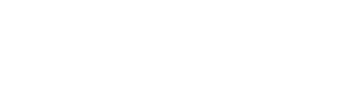

In [ ]:
print(texto_react)

> "O Selenium disponibiliza uma maneira simplificada de se interagir com browsers como o Google Chrome, Mozilla Firefox e Internet Explorer, fazendo com que ao explorar o conteúdo das páginas você tenha uma experiência bem próxima da qual um usuário teria"

> Quando o usa, você pode especificar qual Webdriver você vai utilizar. Aqui vamos utilizar o ChromeDriver, uma ferramenta de código aberto que possibilita a comunicação do selenium com o Google Chrome

https://medium.com/nexoos/usando-selenium-chrome-driver-e-capybara-para-automatizar-relat%C3%B3rios-web-459f949c75e5


## Instalações

In [4]:
!pip install -U selenium
!apt-get update #atualiza a lista das versões dos pacotes disponíveis
!apt install chromium-chromedriver

     |████████████████████████████████| 958 kB 5.3 MB/s 
     |████████████████████████████████| 138 kB 44.6 MB/s 
     |████████████████████████████████| 356 kB 48.7 MB/s 
     |████████████████████████████████| 55 kB 2.9 MB/s 
     |████████████████████████████████| 3.6 MB 33.5 MB/s 
     |████████████████████████████████| 54 kB 2.8 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.7 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:14 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:15 http://ppa

### Importa e instancia webdriver Chrome 

In [8]:
from selenium import webdriver

options = webdriver.ChromeOptions()
options.add_argument('--headless') # não renderiza parte gráfica
options.add_argument('--no-sandbox') #obrigatório, caso contrário gera erro, pois está abrindo como root e exige --no-sandbox

#Veja mais opções aqui:
#https://peter.sh/experiments/chromium-command-line-switches/

driver = webdriver.Chrome(options = options)

## Exemplo 1

https://www.youtube.com/watch?v=eHZ_d0bINkM

In [9]:
url = 'https://covid.saude.gov.br/'
driver.get(url)

In [10]:
print(driver.current_url)

https://covid.saude.gov.br/


In [ ]:
csv_button = driver.find_element_by_xpath('/html/body/app-root/ion-app/ion-router-outlet/app-home/ion-content/div[1]/div[2]/ion-button')

In [12]:
csv_button.click()

Comandos selenium de busca (retornam WebElements ou Exceção noSuchElementException):

URL: https://selenium-python.readthedocs.io/locating-elements.html#locating-elements

* find_element_by_class_name(className)
* find_element_by_id
* find_element_by_css_selector
* find_element_by_link_text (por texto de href)
* find_element_by_partial_link_text (por pedaço de texto de href)
* find_element_by_tag_name
* find_element_by_xpath
    
Estes comandos retornam a primeira ocorrência. Para encontrar todas, as funções acima possuem a versão que retorna lista trocando _element por _elements

* find_elements_by_id etc.

## Exemplo 2

In [ ]:
driver.get('https://www.infomoney.com.br/')

driver.implicitly_wait(3) # espera alguns segundos para a página carregar

dados1 = driver.find_element_by_id('high').text
dados2 = driver.find_elements_by_id('high')[0].text

print(dados1)
print("-----")
print(dados2)

CSNA3 +7.97% R$ 21,39
VIVT3 +6.81% R$ 53,00
TIMS3 +5.14% R$ 13,48
BIDI11 +4.77% R$ 40,81
CYRE3 +4.06% R$ 15,12
-----
CSNA3 +7.97% R$ 21,39
VIVT3 +6.81% R$ 53,00
TIMS3 +5.14% R$ 13,48
BIDI11 +4.77% R$ 40,81
CYRE3 +4.06% R$ 15,12


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  


## Exemplo 3

https://medium.com/data-hackers/web-scraping-com-python-para-pregui%C3%A7osos-unindo-beautifulsoup-e-selenium-parte-2-8cfebf4f34e

In [ ]:
import requests as rq
from bs4 import BeautifulSoup

In [ ]:
url = 'https://www.telelistas.net/rn/natal'

response = rq.get(url) 
bs = BeautifulSoup(response.text,'html.parser') #Cria objeto BeautifulSoup com analisador de HTML (parser)

In [ ]:
links = bs.find_all('a', href=True)[1:] #pega do segundo em diante, pq o primeiro é a logo
print(len(links))
print(links[0].get_text())
print(links[0]['href']) #pega o href

195
Academias Desportivas
/rn/natal/academias+desportivas


In [ ]:
setores=[]
contagem = []
i = 0
for a in bs.find_all('a', href=True)[1:]:
  setores.append(a.text)
  print(a.text)
  print('https://www.telelistas.net'+a['href'])
  driver.get('https://www.telelistas.net'+a['href'])
  driver.implicitly_wait(5) 
  con = driver.find_element_by_xpath("//div[contains(text(),'Pág')]") #https://www.codegrepper.com/code-examples/whatever/xpath+contains%28text%29

  contagem.append(con.text)  
  print(con.text)
  print("##")
  i+=1
  if i == 10:
    break
        


Academias Desportivas
https://www.telelistas.net/rn/natal/academias+desportivas


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  # Remove the CWD from sys.path while we load stuff.


Página 1 de 5
##
Acessórios para Automóveis
https://www.telelistas.net/rn/natal/acessorios+para+automoveis
Página 1 de 7
##
Advogado
https://www.telelistas.net/rn/natal/advogado
Página 1 de 21
##
Agências de Turismo
https://www.telelistas.net/rn/natal/agencias+de+turismo
Página 1 de 10
##
Alarmes
https://www.telelistas.net/rn/natal/alarmes
Página 1 de 2
##
Aluguel de Automóveis
https://www.telelistas.net/rn/natal/aluguel+de+automoveis
Página 1 de 8
##
Aluguel de Brinquedos
https://www.telelistas.net/rn/natal/aluguel+de+brinquedos
Página 1 de 1
##
Aluguel de Casas de Festas
https://www.telelistas.net/rn/natal/aluguel+de+casas+de+festas
Página 1 de 1
##
Aluguel de Equipamento de Som e Iluminação
https://www.telelistas.net/rn/natal/aluguel+de+equipamento+de+som+e+iluminacao
Página 1 de 2
##
Aluguel de Ônibus
https://www.telelistas.net/rn/natal/aluguel+de+onibus
Página 1 de 2
##


In [ ]:
setores

['Academias Desportivas',
 'Acessórios para Automóveis',
 'Advogado',
 'Agências de Turismo',
 'Alarmes',
 'Aluguel de Automóveis',
 'Aluguel de Brinquedos',
 'Aluguel de Casas de Festas',
 'Aluguel de Equipamento de Som e Iluminação',
 'Aluguel de Ônibus']

In [ ]:
contagem

['Página 1 de 5',
 'Página 1 de 7',
 'Página 1 de 21',
 'Página 1 de 10',
 'Página 1 de 2',
 'Página 1 de 8',
 'Página 1 de 1',
 'Página 1 de 1',
 'Página 1 de 2',
 'Página 1 de 2']

In [ ]:
for count, i in enumerate(contagem):
  if len(i)>1:
    contagem[count] = i.split('de ')[1]
print(len(contagem))

10


In [ ]:
contagem

['5', '7', '21', '10', '2', '8', '1', '1', '2', '2']